In [6]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = '{:,.2f}'.format

from itertools import product

import matplotlib.pyplot as plt

import bamboolib as bam
#bam.enable()
bam.disable()

The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


In [7]:
list_column_keep_2010 = [
    'CBO Ocupação 2002'
    , 'CNAE 2.0 Classe'
    , 'CNAE 95 Classe'
    , 'Vínculo Ativo 31/12'
    , 'Faixa Etária'
    , 'Faixa Remun Dezem (SM)'
    , 'Faixa Remun Média (SM)'
    , 'Faixa Tempo Emprego'
    , 'Escolaridade após 2005'
    , 'Mun Trab'
    , 'Município'
    , 'Nacionalidade'
    , 'Natureza Jurídica'
    , 'Vl Remun Dezembro Nom'
    , 'Vl Remun Dezembro (SM)'
    , 'Vl Remun Média Nom'
    , 'Vl Remun Média (SM)'
    , 'CNAE 2.0 Subclasse'
    , 'Tamanho Estabelecimento'
    , 'Tipo Estab'
    , 'Tipo Estab.1'
    , 'Tipo Vínculo'
]

type_cat_tam_estabelecimento = CategoricalDtype(categories=[ -1, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], ordered=True)
type_cat_escolaridade = CategoricalDtype(categories=[ -1, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], ordered=True)
type_cat_faixa_etaria = CategoricalDtype(categories=['01', '02', '03', '04', '05', '06', '07', '08'], ordered=True)
type_cat_faixa_remu_media = CategoricalDtype(
    categories=[
        '00'
        ,'01'
        , '02'
        , '03'
        , '04'
        , '05'
        , '06'
        , '07'
        , '08'
        , '09'
        , '10'
        , '11'
    ]
    , ordered=True
)

type_cat_faixa_remu_media_dezembro = CategoricalDtype(
    categories=[
        '00'
        , '01'
        , '02'
        , '03'
        , '04'
        , '05'
        , '06'
        , '07'
        , '08'
        , '09'
        , '10'
        , '11'
        , '12'
    ]
    , ordered=True
)

type_cat_ind_tec = CategoricalDtype(
    categories=[
        'High-technology'
        , 'Medium-high-technology'
        , 'Medium-low-technology'
        , 'Low-technology'
        , 'Without Classification'
    ]
    , ordered=True
)


type_cat_know_services = CategoricalDtype(
    categories=[
        'High-tech knowledge-intensive services'
        , 'Knowledge-intensive financial services'
        , 'Knowledge-intensive market services'
        , 'Other knowledge-intensive services'
        , 'Less knowledge-intensive market services'
        , 'Other less knowledge-intensive services'
        , 'Without Classification'
    ]
    , ordered=True
)


type_cat_potec = CategoricalDtype(
    categories= ['Diretores e Gerentes de P&D'
                 ,'Engenheiros Mecatrônicos'
                 ,'Engenheiros Civis etc'
                 ,'Engenheiros agrônomos, de alimentos, florestais e de pesca'
                 ,'Pesquisadores'
                 ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas'
                 ,'Matemáticos, estatísticos e afins'
                 ,'Profissionais da Informática'
                 ,'Físicos, químicos e afins'
                 ,'Biólogos e biomédicos'
                 ,'Professores de ensino Profissional'
                 ,'Professores de ensino superior'
                 ,'Demais Ocupações'
                ]    
        , ordered=True
)


dic_dtype = {
    'CBO Ocupação 2002' : 'category'
    ,'CNAE 2.0 Classe' : 'category'
    ,'CNAE 95 Classe' : 'category'
    ,'Faixa Etária' : type_cat_faixa_etaria
    ,'Faixa Remun Dezem (SM)' : type_cat_faixa_remu_media_dezembro
    ,'Faixa Remun Média (SM)' : type_cat_faixa_remu_media
    ,'Faixa Tempo Emprego' : 'category'
    ,'Escolaridade após 2005' : type_cat_escolaridade
    ,'Mun Trab' : 'category'
    ,'Município' : 'category'
    ,'Nacionalidade' : 'category'
    ,'Natureza Jurídica' : 'category'
    ,'CNAE 2.0 Subclasse' : 'category'
    ,'Tamanho Estabelecimento' : type_cat_tam_estabelecimento
    ,'Tipo Estab' : 'category'
    ,'Tipo Estab.1' : 'category'
    ,'Tipo Vínculo' : 'category'
    , 'Vl Remun Dezembro Nom' : np.float64
    , 'Vl Remun Média Nom' : np.float32
    , 'Vl Remun Dezembro (SM)' : np.float64
    , 'Vl Remun Média (SM)' : np.float64
    , 'Tempo Emprego' : np.float64
    , 'territorio_tese':'category'
    , 'arranjo':'category'
    , 'knowledge_services':'category'
    , 'technology_industries':type_cat_ind_tec
    , 'potec':type_cat_potec
}

In [8]:
def potec_evolution(ufs = ('pr', 'rs', 'pe'), years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]):

    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    ufs = tuple([unity.upper() for unity in ufs])

    for uf in ufs:
        for year in years:
            df = pd.read_csv(
                f'data/rais_treated/{year}/{uf.upper()}{year}.zip'
                , compression='zip'
                , header=0
                , sep=';'
                , decimal=','
                , dtype=dic_dtype
                , usecols=['territorio_tese', 'potec']
            )

#            filter_potec = df.potec != df.potec.cat.categories[0]    
            filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
            df_derivado = pd.DataFrame(df.loc[filter_rm_territory, :].groupby(by=['territorio_tese', 'potec'], observed=True).size())
            df_derivado.rename(columns={0:'PO Metropolitano'}, inplace=True)

            dict_df[uf + str(year)] = df_derivado

        if len(ufs) == 1 and len(years) == 1:
            break

        elif len(ufs) == 1 and len(years) > 1:
            list_dfs = [dict_df[uf + str(year)].reset_index().drop(columns='territorio_tese').set_index('potec') 
         for uf, year in product(ufs, years)]

            df_derivado = pd.concat(list_dfs,  axis=1)

            df_derivado.columns = years

        else:

            list_dfs = [dict_df[uf + str(year)].reset_index().drop(columns='territorio_tese').set_index('potec') for year in years]

#            list_dfs = [dict_df[uf + str(year)].reset_index().drop(columns='territorio_tese') for year in years]

            df_derivado = pd.concat(list_dfs, axis=1)

            df_derivado.columns = years

            dict_df_ufs[uf] = df_derivado

            dict_df = dict()


            df_derivado = pd.concat(dict_df_ufs.values(),  axis=0, keys=dict_df_ufs.keys())

            dict_potec = {'Diretores e Gerentes de P&D':'Diretores e Gerentes de P&D'
                          ,'Engenheiros Mecatrônicos':'Engenheiros'
                          ,'Engenheiros Civis etc':'Engenheiros'
                          ,'Engenheiros agrônomos, de alimentos, florestais e de pesca':'Engenheiros' 
                          ,'Pesquisadores':'Pesquisadores'
                          ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas':'Profissionais científicos'
                          ,'Matemáticos, estatísticos e afins':'Profissionais científicos'
                          ,'Profissionais da Informática':'Profissionais científicos'
                          ,'Físicos, químicos e afins':'Profissionais científicos'
                          ,'Biólogos e biomédicos':'Profissionais científicos'
                          ,'Professores de ensino Profissional':'Profissionais do Ensino'
                          ,'Professores de ensino superior':'Profissionais do Ensino'
                          ,'Demais Ocupações':'Demais Ocupações'
            }

            df_derivado['Potec Grupo'] = df_derivado.reset_index()['potec'].map(dict_potec).values

            df_derivado[years] = df_derivado[years].fillna(0).astype(np.int64)

            df_derivado['Tipo de Ocupação'] = df_derivado['Potec Grupo'].map({'Demais Ocupações':'Demais Ocupações'}).fillna('POTEC').values

            df_derivado = df_derivado.set_index(['Potec Grupo', 'Tipo de Ocupação'], append=True).reorder_levels([None,'Tipo de Ocupação','Potec Grupo', 'potec'])

            df_derivado.index.names = ['RM','Tipo de Ocupação','Potec Grupo', 'potec']

            df_derivado.rename(index=dict_rms, inplace=True) 

            df_derivado.sort_index(level=[0,1], ascending=False, inplace=True)

    return df_derivado

In [9]:
df_teste = potec_evolution()

In [5]:
# df_teste[df_teste.index.isin(['Porto Alegre'], level=0)]

df_teste

2007  \
RM           Tipo de Ocupação Potec Grupo                 potec                                                         
Recife       POTEC            Profissionais do Ensino     Professores de ensino superior                         6749   
                                                          Professores de ensino Profissional                      784   
                              Profissionais científicos   Profissionais da Informática                           3257   
                                                          Matemáticos, estatísticos e afins                     114   
                                                          Físicos, químicos e afins                             196   
                                                          Biólogos e biomédicos                                   278   
                                                          Biotecnologistas, geneticistas, pesquisadores e...       43   
                              Pesquisadores               Pesquisadores                                           370   
                              Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...      461   
                                                          Engenheiros Mecatrônicos                                  0   
                                                          Engenheiros Civis etc                                  3858   
                              Diretores e Gerentes de P&D Diretores e Gerentes de P&D                              87   
             Demais Ocupações Demais Ocupações            Demais Ocupações                                     785336   
Porto Alegre POTEC            Profissionais do Ensino     Professores de ensino superior                         7961   
                                                          Professores de ensino Profissional                     1599   
                              Profissionais científicos   Profissionais da Informática                           5387   
                                                          Matemáticos, estatísticos e afins                      71   
                                                          Físicos, químicos e afins                             287   
                                                          Biólogos e biomédicos                                   176   
                                                          Biotecnologistas, geneticistas, pesquisadores e...       48   
                              Pesquisadores               Pesquisadores                                           281   
                              Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...      357   
                                                          Engenheiros Mecatrônicos                                  6   
                                                          Engenheiros Civis etc                                  4592   
                              Diretores e Gerentes de P&D Diretores e Gerentes de P&D                             363   
             Demais Ocupações Demais Ocupações            Demais Ocupações                                    1134516   
Curitiba     POTEC            Profissionais do Ensino     Professores de ensino superior                        21637   
                                                          Professores de ensino Profissional                      675   
                              Profissionais científicos   Profissionais da Informática                           5795   
                                                          Matemáticos, estatísticos e afins                     142   
                                                          Físicos, químicos e afins                             250   
                                                          Biólogos e biomédicos                                   230   

In [1]:
 import plotly.express as px

In [10]:
df_teste_plot2 = df_teste.reset_index().drop(columns='potec').groupby(by=['RM', 'Tipo de Ocupação','Potec Grupo']).sum().reset_index().melt(id_vars=['RM', 'Tipo de Ocupação', 'Potec Grupo']).rename(columns={'variable':'ano', 'value':'pessoal'})

In [11]:
df_teste_plot2 = df_teste_plot2[df_teste_plot2['Tipo de Ocupação'] == 'POTEC']

In [12]:
df_teste_plot2

,RM,Tipo de Ocupação,Potec Grupo,ano,pessoal
1,Curitiba,POTEC,Diretores e Gerentes de P&D,2007,281
2,Curitiba,POTEC,Engenheiros,2007,7339
3,Curitiba,POTEC,Pesquisadores,2007,287
4,Curitiba,POTEC,Profissionais científicos,2007,6451
5,Curitiba,POTEC,Profissionais do Ensino,2007,22312
...,...,...,...,...,...
157,Recife,POTEC,Diretores e Gerentes de P&D,2015,212
158,Recife,POTEC,Engenheiros,2015,6466
159,Recife,POTEC,Pesquisadores,2015,460
160,Recife,POTEC,Profissionais científicos,2015,7117


In [13]:
type_cat_potec_grupo = CategoricalDtype(
    categories= ['Profissionais do Ensino', 'Engenheiros', 'Profissionais científicos', 'Pesquisadores', 'Diretores e Gerentes de P&D']    
        , ordered=True
)

In [14]:
df_teste_plot2['Potec Grupo'] = df_teste_plot2['Potec Grupo'].astype(type_cat_potec_grupo)

In [2]:
df_gapminder = px.data.gapminder()

In [15]:
df_gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80,8425333,779.45,AFG,4
1,Afghanistan,Asia,1957,30.33,9240934,820.85,AFG,4
2,Afghanistan,Asia,1962,32.00,10267083,853.10,AFG,4
3,Afghanistan,Asia,1967,34.02,11537966,836.20,AFG,4
4,Afghanistan,Asia,1972,36.09,13079460,739.98,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.35,9216418,706.16,ZWE,716
1700,Zimbabwe,Africa,1992,60.38,10704340,693.42,ZWE,716
1701,Zimbabwe,Africa,1997,46.81,11404948,792.45,ZWE,716
1702,Zimbabwe,Africa,2002,39.99,11926563,672.04,ZWE,716


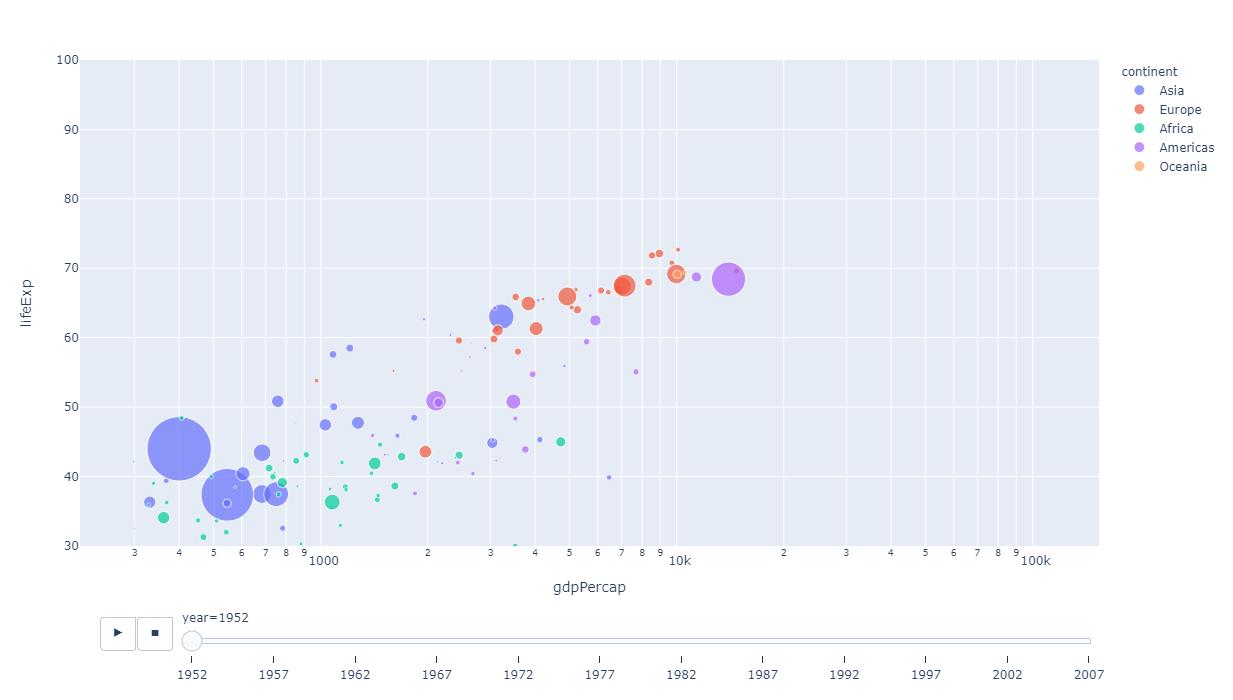

In [5]:
px.scatter(data_frame=df_gapminder, x='gdpPercap', y='lifeExp', log_x=True, log_y=False, color='continent', size='pop', animation_frame='year', size_max=70, height=700, range_y=(30,100), hover_name='country' )

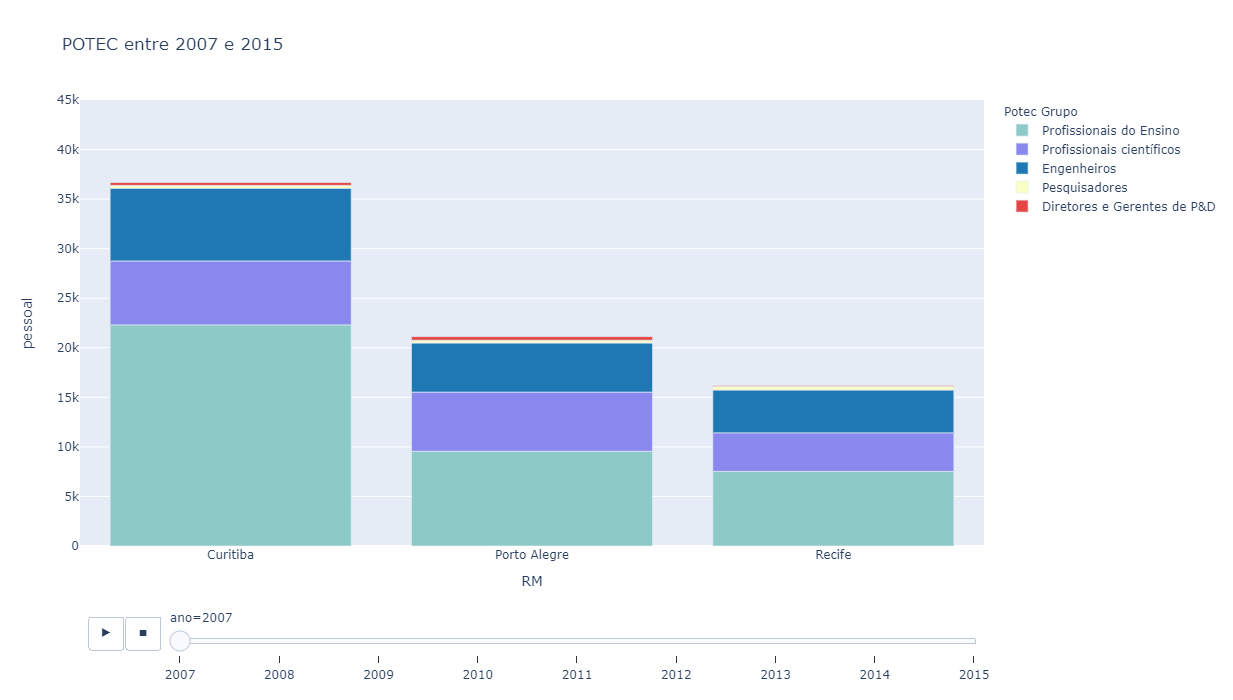

In [53]:
px.bar(data_frame=df_teste_plot2
       , y='pessoal'
       , x='RM'
       , color='Potec Grupo'
       , animation_frame='ano'
       , category_orders={'Potec Grupo':
                          ['Profissionais do Ensino'
                           , 'Profissionais científicos'
                           ,'Engenheiros'
                           , 'Pesquisadores'
                           , 'Diretores e Gerentes de P&D'
                          ]}
       , title=f'POTEC entre {df_teste_plot2.ano.astype(np.int32).min()} e {df_teste_plot2.ano.astype(np.int32).max()}'
       , height=700, color_discrete_sequence=['rgb(141, 201, 199)', 'rgb(136, 136, 238)', '#1F77B4', 'rgb(250, 255, 195)', 'rgb(228,70,70)']
      , range_y=(0,45000))

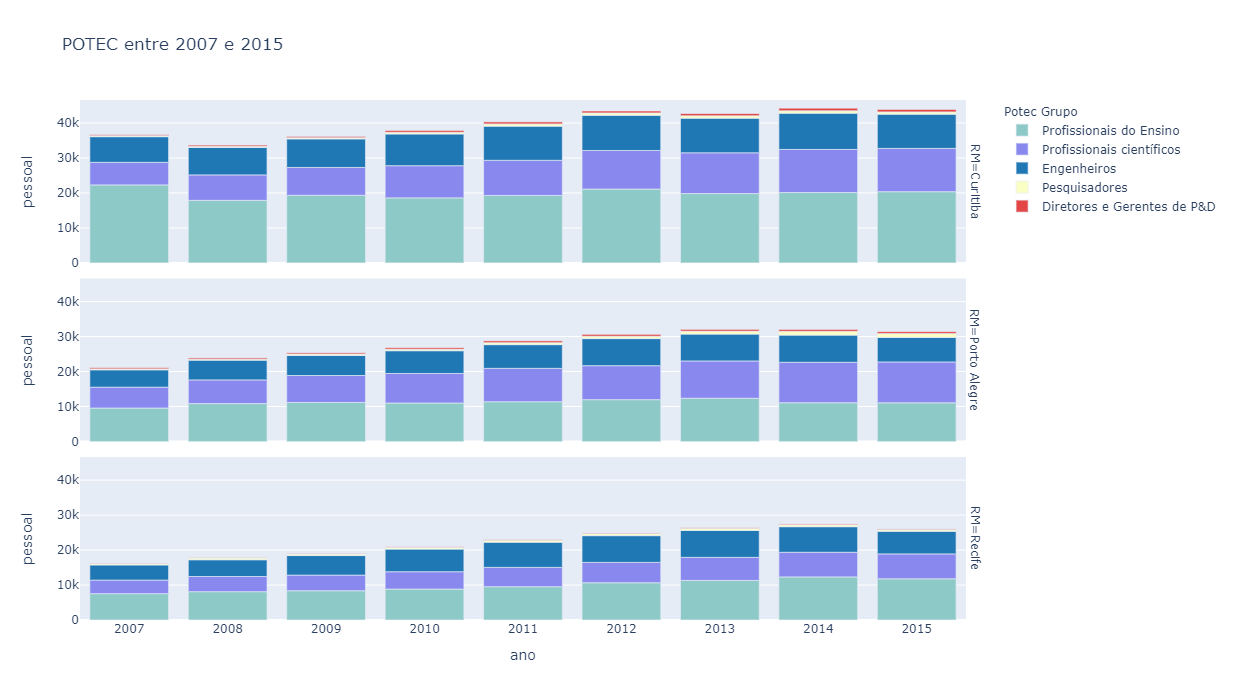

In [17]:
px.bar(data_frame=df_teste_plot2
       , x='ano'
       , y='pessoal'
       , facet_row='RM'
       , color='Potec Grupo'
       , category_orders={'Potec Grupo':
                          ['Profissionais do Ensino'
                           , 'Profissionais científicos'
                           ,'Engenheiros'
                           , 'Pesquisadores'
                           , 'Diretores e Gerentes de P&D'
                          ]}
       , title=f'POTEC entre {df_teste_plot2.ano.astype(np.int32).min()} e {df_teste_plot2.ano.astype(np.int32).max()}'
       , height=700, color_discrete_sequence=['rgb(141, 201, 199)', 'rgb(136, 136, 238)', '#1F77B4', 'rgb(250, 255, 195)', 'rgb(228,70,70)'])

In [18]:
print(px.colors.qualitative.Set1)

['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)', 'rgb(153,153,153)']


In [19]:
def potec_rm_compare(ufs = ('pr', 'rs', 'pe'), year = 2015, multi_index=True):

    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    ufs = tuple([unity.upper() for unity in ufs])

    for uf in ufs:
        df = pd.read_csv(
            f'data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=['territorio_tese', 'potec']
        )
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        df = pd.DataFrame(df.loc[filter_rm_territory, :].groupby(by=['territorio_tese', 'potec'], observed=True).size())
        df.rename(columns={0:'PO Metropolitano'}, inplace=True)
        dict_df[uf] = df

    list_dfs = [dict_df[uf].reset_index().drop(columns='territorio_tese').set_index('potec') for uf in ufs]

    list_rms = [dict_rms[uf] for uf in ufs]

    df = pd.concat(list_dfs, axis=1)

    df.columns= list_rms

    dict_potec = {'Diretores e Gerentes de P&D':'Diretores e Gerentes de P&D'
                      ,'Engenheiros Mecatrônicos':'Engenheiros'
                      ,'Engenheiros Civis etc':'Engenheiros'
                      ,'Engenheiros agrônomos, de alimentos, florestais e de pesca':'Engenheiros' 
                      ,'Pesquisadores':'Pesquisadores'
                      ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas':'Profissionais científicos'
                      ,'Matemáticos, estatísticos e afins':'Profissionais científicos'
                      ,'Profissionais da Informática':'Profissionais científicos'
                      ,'Físicos, químicos e afins':'Profissionais científicos'
                      ,'Biólogos e biomédicos':'Profissionais científicos'
                      ,'Professores de ensino Profissional':'Profissionais do Ensino'
                      ,'Professores de ensino superior':'Profissionais do Ensino'
                      ,'Demais Ocupações':'Demais Ocupações'
                 }

    df['Potec Grupo'] = df.reset_index()['potec'].map(dict_potec).values

    df[list_rms] = df[list_rms].fillna(0).astype(np.int64)

    df['Tipo de Ocupação'] = df['Potec Grupo'].map({'Demais Ocupações':'Demais Ocupações'}).fillna('POTEC').values

    df = df.set_index(['Potec Grupo', 'Tipo de Ocupação'], append=True).reorder_levels(['Tipo de Ocupação','Potec Grupo', 'potec'])

    df.index.names = ['Tipo de Ocupação','Potec Grupo', 'Potec']

    df.sort_index(level=[0,1], ascending=False, inplace=True)

    if multi_index==False:
        df.reset_index(inplace=True)
    
    return df

In [20]:
potec_rm_compare()

Curitiba  \
Tipo de Ocupação Potec Grupo                 Potec                                                          
POTEC            Profissionais do Ensino     Professores de ensino superior                         18590   
                                             Professores de ensino Profissional                      1782   
                 Profissionais científicos   Biólogos e biomédicos                                    515   
                                             Físicos, químicos e afins                              318   
                                             Profissionais da Informática                           11332   
                                             Matemáticos, estatísticos e afins                      141   
                                             Biotecnologistas, geneticistas, pesquisadores e...        77   
                 Pesquisadores               Pesquisadores                                            648   
                 Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...      1140   
                                             Engenheiros Civis etc                                   8539   
                                             Engenheiros Mecatrônicos                                  96   
                 Diretores e Gerentes de P&D Diretores e Gerentes de P&D                              719   
Demais Ocupações Demais Ocupações            Demais Ocupações                                     1179123   

                                                                                                 Porto Alegre  \
Tipo de Ocupação Potec Grupo                 Potec                                                              
POTEC            Profissionais do Ensino     Professores de ensino superior                              9628   
                                             Professores de ensino Profissional                          1435   
                 Profissionais científicos   Biólogos e biomédicos                                        605   
                                             Físicos, químicos e afins                                  411   
                                             Profissionais da Informática                               10444   
                                             Matemáticos, estatísticos e afins                          132   
                                             Biotecnologistas, geneticistas, pesquisadores e...            85   
                 Pesquisadores               Pesquisadores                                               1111   
                 Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...          1001   
                                             Engenheiros Civis etc                                       5942   
                                             Engenheiros Mecatrônicos                                      60   
                 Diretores e Gerentes de P&D Diretores e Gerentes de P&D                                  536   
Demais Ocupações Demais Ocupações            Demais Ocupações                                         1322083   

                                                                                                  Recife  
Tipo de Ocupação Potec Grupo                 Potec                                                        
POTEC            Profissionais do Ensino     Professores de ensino superior                         9944  
                                             Professores de ensino Profissional                     1841  
                 Profissionais científicos   Biólogos e biomédicos                                   423  
                                             Físicos, químicos e afins                             304  
                                             Profissionais da Informática                           6130  
                

In [21]:
df = potec_rm_compare(multi_index=False)

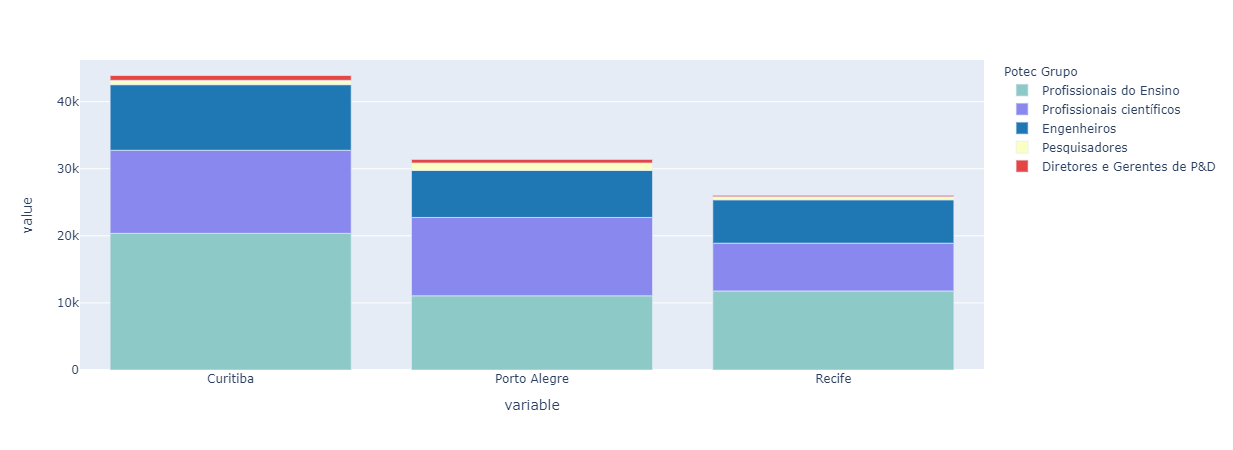

In [22]:
px.bar(
    data_frame=df[df['Tipo de Ocupação'] == 'POTEC'].groupby('Potec Grupo').sum().reset_index().melt(id_vars='Potec Grupo')
    , x='variable'
    , y='value'
    , color='Potec Grupo'
    , category_orders={'Potec Grupo':['Profissionais do Ensino', 'Profissionais científicos', 'Engenheiros', 'Pesquisadores', 'Diretores e Gerentes de P&D']}
    , color_discrete_sequence=['rgb(141, 201, 199)', 'rgb(136, 136, 238)', '#1F77B4', 'rgb(250, 255, 195)', 'rgb(228,70,70)']
)

In [84]:
def potec_proporcao_uf(ufs = ('pr', 'rs', 'pe'), year = 2015, tidy=True):

    ufs = ('pr', 'rs', 'pe')
    year = 2015
    multi_index=False

    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    ufs = tuple([unity.upper() for unity in ufs])

    for uf in ufs:
        df = pd.read_csv(
            f'data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=['territorio_tese', 'potec']
        )
        
        df = pd.DataFrame(df.groupby(by=['territorio_tese', 'potec'], observed=True).size())
        df.rename(columns={0:'Pessoal'}, inplace=True)
        dict_df[uf] = df

    list_dfs = [dict_df[uf].reset_index().set_index('potec') for uf in ufs]

    list_rms = [dict_rms[uf] for uf in ufs]

    df = pd.concat(list_dfs, axis=0)

    dict_potec = {'Diretores e Gerentes de P&D':'Diretores e Gerentes de P&D'
                      ,'Engenheiros Mecatrônicos':'Engenheiros'
                      ,'Engenheiros Civis etc':'Engenheiros'
                      ,'Engenheiros agrônomos, de alimentos, florestais e de pesca':'Engenheiros' 
                      ,'Pesquisadores':'Pesquisadores'
                      ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas':'Profissionais científicos'
                      ,'Matemáticos, estatísticos e afins':'Profissionais científicos'
                      ,'Profissionais da Informática':'Profissionais científicos'
                      ,'Físicos, químicos e afins':'Profissionais científicos'
                      ,'Biólogos e biomédicos':'Profissionais científicos'
                      ,'Professores de ensino Profissional':'Profissionais do Ensino'
                      ,'Professores de ensino superior':'Profissionais do Ensino'
                      ,'Demais Ocupações':'Demais Ocupações'
                 }

    df['Potec Grupo'] = df.reset_index()['potec'].map(dict_potec).values

    df['Tipo Pessoal'] = df.reset_index()['potec'].map({'Demais Ocupações':'Demais Ocupações'}).fillna('POTEC').values

    df = df.reset_index()[['territorio_tese', 'Tipo Pessoal', 'Potec Grupo', 'potec', 'Pessoal']]

    df['UF'] = df['territorio_tese'].map({'Restante do Paraná':'PR'
                               , 'Espaço Metropolitano de Curitiba':'PR'
                               ,'Restante do Rio Grande do Sul':'RS'
                               ,'Espaço Metropolitano de Porto Alegre':'RS'
                               ,'Espaço Metropolitano de Recife':'PE'
                               , 'Restante de Pernambuco':'PE'}).values

    if tidy == True:    
        df = df[df['Tipo Pessoal'] == 'POTEC'].drop(columns=['potec', 'Potec Grupo']).groupby(['UF', 'territorio_tese', 'Tipo Pessoal']).sum().reset_index()
    
    else:
        df = df[['UF','territorio_tese', 'Tipo Pessoal', 'Potec Grupo', 'potec', 'Pessoal']]
    
    return df

In [85]:
df1 = potec_proporcao_uf(tidy=False)

In [86]:
df1

,UF,territorio_tese,Tipo Pessoal,Potec Grupo,potec,Pessoal
0,PR,Restante do Paraná,POTEC,Diretores e Gerentes de P&D,Diretores e Gerentes de P&D,332
1,PR,Restante do Paraná,POTEC,Engenheiros,Engenheiros Mecatrônicos,53
2,PR,Restante do Paraná,POTEC,Engenheiros,Engenheiros Civis etc,4371
3,PR,Restante do Paraná,POTEC,Engenheiros,"Engenheiros agrônomos, de alimentos, florestai...",2046
4,PR,Restante do Paraná,POTEC,Pesquisadores,Pesquisadores,367
...,...,...,...,...,...,...
73,PE,Restante de Pernambuco,POTEC,Profissionais científicos,"Físicos, químicos e afins",73
74,PE,Restante de Pernambuco,POTEC,Profissionais científicos,Biólogos e biomédicos,191
75,PE,Restante de Pernambuco,POTEC,Profissionais do Ensino,Professores de ensino Profissional,1476
76,PE,Restante de Pernambuco,POTEC,Profissionais do Ensino,Professores de ensino superior,4516


In [83]:
df1[df1['Tipo Pessoal'] == 'POTEC'][['UF','territorio_tese', 'Potec Grupo', 'potec', 'Pessoal']]

,UF,territorio_tese,Potec Grupo,potec,Pessoal
0,PR,Restante do Paraná,Diretores e Gerentes de P&D,Diretores e Gerentes de P&D,332
1,PR,Restante do Paraná,Engenheiros,Engenheiros Mecatrônicos,53
2,PR,Restante do Paraná,Engenheiros,Engenheiros Civis etc,4371
3,PR,Restante do Paraná,Engenheiros,"Engenheiros agrônomos, de alimentos, florestai...",2046
4,PR,Restante do Paraná,Pesquisadores,Pesquisadores,367
...,...,...,...,...,...
72,PE,Restante de Pernambuco,Profissionais científicos,Profissionais da Informática,653
73,PE,Restante de Pernambuco,Profissionais científicos,"Físicos, químicos e afins",73
74,PE,Restante de Pernambuco,Profissionais científicos,Biólogos e biomédicos,191
75,PE,Restante de Pernambuco,Profissionais do Ensino,Professores de ensino Profissional,1476


In [87]:
df = potec_proporcao_uf(tidy=True)
df

,UF,territorio_tese,Tipo Pessoal,Pessoal
0,PE,Espaço Metropolitano de Recife,POTEC,26040
1,PE,Restante de Pernambuco,POTEC,7921
2,PR,Espaço Metropolitano de Curitiba,POTEC,43897
3,PR,Restante do Paraná,POTEC,39296
4,RS,Espaço Metropolitano de Porto Alegre,POTEC,31390
5,RS,Restante do Rio Grande do Sul,POTEC,27008


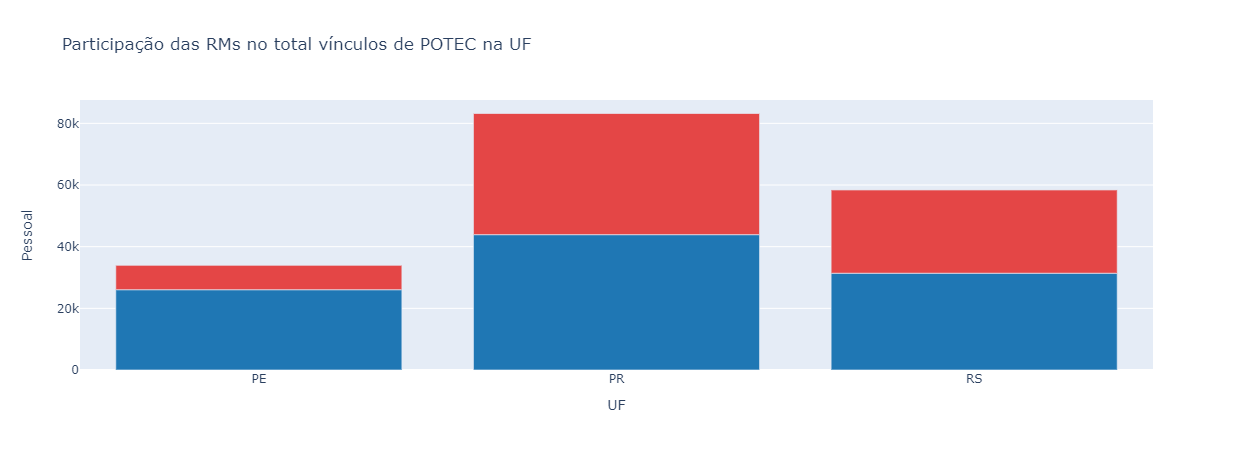

In [69]:
fig = px.bar(data_frame=df
            , x='UF'
            , y='Pessoal'
            , color='territorio_tese'
            , color_discrete_sequence=['#1F77B4', 'rgb(228,70,70)']
            , hover_name='territorio_tese'
            , title='Participação das RMs no total vínculos de POTEC na UF')

fig.update_layout(showlegend=False)

fig.show()

In [ ]:
px.bar()

In [98]:
df[list_rms] = df[list_rms].fillna(0).astype(np.int64)

df['Tipo de Ocupação'] = df['Potec Grupo'].map({'Demais Ocupações':'Demais Ocupações'}).fillna('POTEC').values

df = df.set_index(['Potec Grupo', 'Tipo de Ocupação'], append=True).reorder_levels(['Tipo de Ocupação','Potec Grupo', 'potec'])

df.index.names = ['Tipo de Ocupação','Potec Grupo', 'Potec']

df.sort_index(level=[0,1], ascending=False, inplace=True)

if multi_index==False:
    df.reset_index(inplace=True)

,Potec Grupo,variable,value
0,Diretores e Gerentes de P&D,Curitiba,719
1,Engenheiros,Curitiba,9775
2,Pesquisadores,Curitiba,648
3,Profissionais científicos,Curitiba,12383
4,Profissionais do Ensino,Curitiba,20372
5,Diretores e Gerentes de P&D,Porto Alegre,536
6,Engenheiros,Porto Alegre,7003
7,Pesquisadores,Porto Alegre,1111
8,Profissionais científicos,Porto Alegre,11677
9,Profissionais do Ensino,Porto Alegre,11063


In [96]:
df

,Tipo de Ocupação,Potec Grupo,Potec,Curitiba,Porto Alegre,Recife
0,POTEC,Profissionais do Ensino,Professores de ensino superior,18590,9628,9944
1,POTEC,Profissionais do Ensino,Professores de ensino Profissional,1782,1435,1841
2,POTEC,Profissionais científicos,Biólogos e biomédicos,515,605,423
3,POTEC,Profissionais científicos,"Físicos, químicos e afins",318,411,304
4,POTEC,Profissionais científicos,Profissionais da Informática,11332,10444,6130
5,POTEC,Profissionais científicos,"Matemáticos, estatísticos e afins",141,132,203
6,POTEC,Profissionais científicos,"Biotecnologistas, geneticistas, pesquisadores ...",77,85,57
7,POTEC,Pesquisadores,Pesquisadores,648,1111,460
8,POTEC,Engenheiros,"Engenheiros agrônomos, de alimentos, florestai...",1140,1001,481
9,POTEC,Engenheiros,Engenheiros Civis etc,8539,5942,5955


In [3]:
def aggregate_potec(ufs = ['pr', 'rs', 'pe'], year = [2015]):



    dict_df = dict()

    ufs = tuple([unity.upper() for unity in ufs])

    for uf, year in product(ufs, year):

        df = pd.read_csv(
            f'data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=['territorio_tese', 'potec']
        )

        filter_potec = df.potec != df.potec.cat.categories[0]  
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
#        filter_uf_territory = df.territorio_tese != df.territorio_tese.cat.categories[0]

        df_composed = pd.DataFrame(df.loc[filter_potec & filter_rm_territory, :].groupby(by=['territorio_tese', 'potec'], observed=True).size().sort_index())


        df_composed['PO estadual'] = df.loc[filter_potec,:].groupby(by=['potec'], observed=True).count().sort_index().values

        df_composed.rename(columns={0:'PO Metropolitano'}, inplace=True)

        df_composed['Participação do setor no espaço metropolitano (%)'] = df_composed['PO Metropolitano'] / df_composed['PO Metropolitano'].sum() *100

        df_composed['Participação do espaço metropolitano no estado (%)'] = df_composed['PO Metropolitano'] / df_composed['PO estadual'] *100

        dict_df[uf] = df_composed
        
        
    list_dfs = [dict_df[uf].reset_index().drop(columns='territorio_tese').set_index('potec') for uf in ufs]
    list_keys = [dict_df[uf].index[0][0] for uf in ufs]
    
    df_composed = pd.concat(list_dfs,  axis=0, keys=list_keys)
    
    return df_composed

In [4]:
df = aggregate_potec()

In [8]:
def tabela2(ufs = ['pr'], years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]):

    dict_df = dict()

    ufs = tuple([unity.upper() for unity in ufs])

    for uf, year in product(ufs, years):

        df = pd.read_csv(
            f'data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=['territorio_tese', 'potec']
        )

        filter_potec = df.potec != df.potec.cat.categories[0]    
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
#        filter_uf_territory = df.territorio_tese != df.territorio_tese.cat.categories[0]

        df_derivado = pd.DataFrame(df.loc[filter_potec & filter_rm_territory, :].groupby(by=['territorio_tese', 'potec'], observed=True).size())


    #    df_derivado['PO estadual'] = np.array(df.loc[filter_industry, :].groupby(by=['technology_industries'], observed=True).size())

        df_derivado.rename(columns={0:'PO Metropolitano'}, inplace=True)

    #    df_derivado['Participação do setor no espaço metropolitano (%)'] = df_derivado['PO Metropolitano'] / df_derivado['PO Metropolitano'].sum() *100

    #    df_derivado['Participação do espaço metropolitano no estado (%)'] = df_derivado['PO Metropolitano'] / df_derivado['PO estadual'] *100

        dict_df[uf + str(year)] = df_derivado

    list_dfs = [dict_df[uf + str(year)].reset_index().drop(columns='territorio_tese').set_index('potec') 
     for uf, year in product(ufs, years)]
    
    df_derivado = pd.concat(list_dfs,  axis=1)
    
    df_derivado.columns = years
    
    
    return df_derivado


    #pd.concat([dict_df[ufs[0]].reset_index().drop(columns='territorio_tese').set_index('technology_industries')
    #           , dict_df[ufs[1]].reset_index().drop(columns='territorio_tese').set_index('technology_industries')
    #           , dict_df[ufs[2]].reset_index().drop(columns='territorio_tese').set_index('technology_industries')]
    #          ,  axis=0
    #          , keys=[dict_df[ufs[0]].index[0][0], dict_df[ufs[1]].index[0][0], dict_df[ufs[2]].index[0][0]])

In [42]:
ufs = ['pr', 'pe'] 

years = [2007, 2008]


dict_df = dict()
dict_df_ufs = dict()

ufs = tuple([unity.upper() for unity in ufs])

In [13]:
df_aggregated  = pd.concat([df_pr, df_rs, df_pe], keys=['Curitiba', 'Porto Alegre', 'Recife'])

In [14]:
df_aggregated

2007    2008    2009  \
             knowledge_services                                                 
Curitiba     High-tech knowledge-intensive services     16963   18294   18926   
             Knowledge-intensive financial services     25735   26105   26324   
             Knowledge-intensive market services        51660   52228   62488   
             Less knowledge-intensive market services  331759  349038  363829   
             Other knowledge-intensive services        285296  296046  335609   
             Other less knowledge-intensive services    35013   34995   36125   
Porto Alegre High-tech knowledge-intensive services     17572   19566   20586   
             Knowledge-intensive financial services     33776   32572   26382   
             Knowledge-intensive market services        53772   55858   58868   
             Less knowledge-intensive market services  350793  377963  396538   
             Other knowledge-intensive services        363683  363223  373483   
             Other less knowledge-intensive services    36579   38214   38997   
Recife       High-tech knowledge-intensive services      9267    9530    9906   
             Knowledge-intensive financial services     13213   13861   13680   
             Knowledge-intensive market services        56397   61900   74168   
             Less knowledge-intensive market services  268098  287519  302515   
             Other knowledge-intensive services        276482  285849  300055   
             Other less knowledge-intensive services    26717   25853   26416   

                                                         2010    2011    2012  \
             knowledge_services                                                 
Curitiba     High-tech knowledge-intensive services     23709   28406   29525   
             Knowledge-intensive financial services     27470   28270   26415   
             Knowledge-intensive market services        68867   71729   76643   
             Less knowledge-intensive market services  387128  409595  429826   
             Other knowledge-intensive services        315366  330976  376654   
             Other less knowledge-intensive services    34604   34623   32500   
Porto Alegre High-tech knowledge-intensive services     22333   24306   29122   
             Knowledge-intensive financial services     24784   27888   28483   
             Knowledge-intensive market services        73940   74848   78722   
             Less knowledge-intensive market services  428284  444564  462034   
             Other knowledge-intensive services        380217  383289  397660   
             Other less knowledge-intensive services    39574   40354   39251   
Recife       High-tech knowledge-intensive services     11756   13258   15097   
             Knowledge-intensive financial services     14595   15912   13625   
             Knowledge-intensive market services        80868   79126   99451   
             Less knowledge-intensive market services  337482  368733  396527   
             Other knowledge-intensive services        314620  336065  327226   
             Other less knowledge-intensive services    29289   29296   31115   

                                                         2013    2014    2015  
             knowledge_services                                                
Curitiba     High-tech knowledge-intensive services     28309   28251   28037  
             Knowledge-intensive financial services     28206   29311   29920  
             Knowledge-intensive market services        80327   81232   79725  
             Less knowledge-intensive market services  439361  448331  436420  
             Other knowledge-intensive services        354086  356210  357303  
             Other less knowledge-intensive services    31152   29267   30966  
Porto Alegre High-tech knowledge-intensive services     30062   31626   30992  
             Knowledge-intensive financial services     28809   29092   28934  
             Kn

In [169]:
legenda = df_aggregated.index[1][0] + '-' + df_aggregated.index[1][1]

No gráfico abaixo, quero colocar um subplot só com o comportamento da alta tecnologia

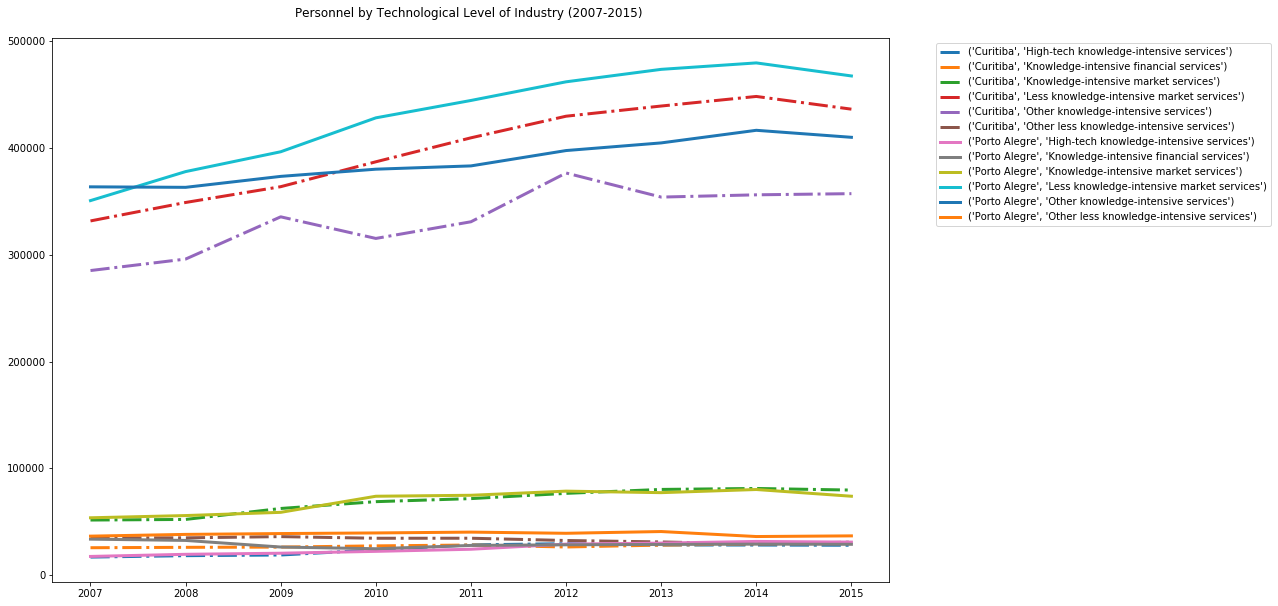

In [15]:
linestyles = ['-.','-.', '-.', '-.', '-.', '-.', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted', 'dotted', 'dotted', 'dotted']

linecolors = ['#274E13','#38761D','#6AA84F','#93C47D', '#B45F06','#cb8934','#dba452','#FFE599','#351C75','#674EA7','#8E7CC3','#B4A7D6']

plt.figure(figsize=(15,10))
for i, linestyle, color in zip(range(len(df_aggregated.index)), linestyles, linecolors):
    plt.plot(df_aggregated.loc[df_aggregated.index[i]], linestyle=linestyle, linewidth=3)
plt.legend(df_aggregated.index,  loc='upper left', bbox_to_anchor=(1.05, 1));
plt.title('Personnel by Technological Level of Industry (2007-2015) \n');

In [16]:
#### df_aggregated['2007 a 2009 (%)'] = ((df_aggregated[2009] / df_aggregated[2007] - 1) * 100).values
df_aggregated['2009 a 2011 (%)'] = ((df_aggregated[2011] / df_aggregated[2009] - 1) * 100).values
df_aggregated['2011 a 2013 (%)'] = ((df_aggregated[2013] / df_aggregated[2011] - 1) * 100).values
df_aggregated['2013 a 2015 (%)'] = ((df_aggregated[2015] / df_aggregated[2013] - 1) * 100).values

df_aggregated

2007    2008    2009  \
             knowledge_services                                                 
Curitiba     High-tech knowledge-intensive services     16963   18294   18926   
             Knowledge-intensive financial services     25735   26105   26324   
             Knowledge-intensive market services        51660   52228   62488   
             Less knowledge-intensive market services  331759  349038  363829   
             Other knowledge-intensive services        285296  296046  335609   
             Other less knowledge-intensive services    35013   34995   36125   
Porto Alegre High-tech knowledge-intensive services     17572   19566   20586   
             Knowledge-intensive financial services     33776   32572   26382   
             Knowledge-intensive market services        53772   55858   58868   
             Less knowledge-intensive market services  350793  377963  396538   
             Other knowledge-intensive services        363683  363223  373483   
             Other less knowledge-intensive services    36579   38214   38997   
Recife       High-tech knowledge-intensive services      9267    9530    9906   
             Knowledge-intensive financial services     13213   13861   13680   
             Knowledge-intensive market services        56397   61900   74168   
             Less knowledge-intensive market services  268098  287519  302515   
             Other knowledge-intensive services        276482  285849  300055   
             Other less knowledge-intensive services    26717   25853   26416   

                                                         2010    2011    2012  \
             knowledge_services                                                 
Curitiba     High-tech knowledge-intensive services     23709   28406   29525   
             Knowledge-intensive financial services     27470   28270   26415   
             Knowledge-intensive market services        68867   71729   76643   
             Less knowledge-intensive market services  387128  409595  429826   
             Other knowledge-intensive services        315366  330976  376654   
             Other less knowledge-intensive services    34604   34623   32500   
Porto Alegre High-tech knowledge-intensive services     22333   24306   29122   
             Knowledge-intensive financial services     24784   27888   28483   
             Knowledge-intensive market services        73940   74848   78722   
             Less knowledge-intensive market services  428284  444564  462034   
             Other knowledge-intensive services        380217  383289  397660   
             Other less knowledge-intensive services    39574   40354   39251   
Recife       High-tech knowledge-intensive services     11756   13258   15097   
             Knowledge-intensive financial services     14595   15912   13625   
             Knowledge-intensive market services        80868   79126   99451   
             Less knowledge-intensive market services  337482  368733  396527   
             Other knowledge-intensive services        314620  336065  327226   
             Other less knowledge-intensive services    29289   29296   31115   

                                                         2013    2014    2015  \
             knowledge_services                                                 
Curitiba     High-tech knowledge-intensive services     28309   28251   28037   
             Knowledge-intensive financial services     28206   29311   29920   
             Knowledge-intensive market services        80327   81232   79725   
             Less knowledge-intensive market services  439361  448331  436420   
             Other knowledge-intensive services        354086  356210  357303   
             Other less knowledge-intensive services    31152   29267   30966   
Porto Alegre High-tech knowledge-intensive services     30062   31626   30992   
             Knowledge-intensive financial services     28809   29092   28934   
     